In [182]:
!pip install pandas scikit-learn xgboost seaborn

In [2]:
import boto3
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [184]:
# Initialize a boto3 client with your AWS credentials
# Access key ID & Secret access key shared in your mail
s3_client = boto3.client(
    's3',
    aws_access_key_id='',
    aws_secret_access_key=''
)

### Read  CSV file from S3
# Specify your  AWS S3 bucket  name
bucket_name = 'datathon-3.0'
read_file_name = 'Q2-new-products.csv'

# Get the object from the bucket
response = s3_client.get_object(Bucket=bucket_name, Key=read_file_name)

# Read the object (which is in bytes) into a DataFrame
with open(read_file_name, 'wb') as fp:
    fp.write(BytesIO(response['Body'].read()).getbuffer())

df = pd.read_csv(read_file_name)
df.head()


,PACK_ID
0,352
1,1735
2,179
3,1434
4,426


In [3]:
product_df = pd.read_csv('TBL_PRODUCT_CATALOGUE.csv')
product_df['UNIT_PRICE'] = product_df['PACK_PRICE'] / product_df['DATA_VOL_GB']
product_df.head()

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue,4.056250
1,2,Standard,Cash,328,30,24.0,Continue,13.666667
2,3,Premium,Mobile Walet,176,3,24.0,Discontinue,7.333333
3,4,Premium,Cash,558,15,64.0,Discontinue,8.718750
4,5,Premium,Cash,300,7,20.0,New,15.000000


In [4]:
purchase_df = pd.read_csv('TBL_PACK_PURCHASE.csv')
purchase_df.head()

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS
0,20190703,CD20EDFC8000A7,1756,1
1,20190522,CD1F932E0A89C1,1524,1
2,20190522,CD201715F62164,1524,1
3,20190623,CD1F7B4DD83C5B,1524,1
4,20190523,CD1F7BD12742B8,1524,1


In [5]:
consumption_df = pd.read_csv('TBL_DATA_CONSUMPTION.csv')
print(len(consumption_df))
consumption_df.head()

23375373


,EVENT_DATE,CUSTOMER_ID,TOTAL_VOLUME_GB,VOLUME_GB_IN_HIGH_BANDWIDTH
0,20190914,CD1F7653F6BE80,14.2695,14.2695
1,20190916,CD1F7653F6BE80,22.2891,22.2891
2,20190716,CD1F7653F6BE80,26.3086,26.3086
3,20190906,CD1F7653F6BE80,6.8477,6.7813
4,20190921,CD1F7653F6BE80,15.1406,15.1406


In [6]:
test_df = pd.read_csv('Q2-new-products.csv')
test_df.head()

,PACK_ID
0,352
1,1735
2,179
3,1434
4,426


In [7]:
purchase_product_df = pd.merge(purchase_df, product_df, how='inner', on='PACK_ID')
purchase_product_df['EVENT_DATE'] = pd.to_datetime(purchase_product_df['EVENT_DATE'], format='%Y%m%d')
purchase_product_df.sort_values(by='EVENT_DATE', inplace=True, ignore_index=True)
purchase_product_df['TOTAL_DATA_VOL_GB'] = purchase_product_df['DATA_VOL_GB'] * purchase_product_df['HITS']
purchase_product_df.head()

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,TOTAL_DATA_VOL_GB
0,2019-05-21,CD218554C71203,278,1,Premium,Cash,356,7,56.0,Discontinue,6.357143,56.0
1,2019-05-21,CD20F0D0031916,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0
2,2019-05-21,CD20F3F3132F06,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0
3,2019-05-21,CD212DD33D5C02,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0
4,2019-05-21,CD212DD6E5B84B,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0


In [8]:
purchase_product_df['PRODUCT_STATUS'].value_counts()

PRODUCT_STATUS
Discontinue    1084280
Continue        124430
Name: count, dtype: int64

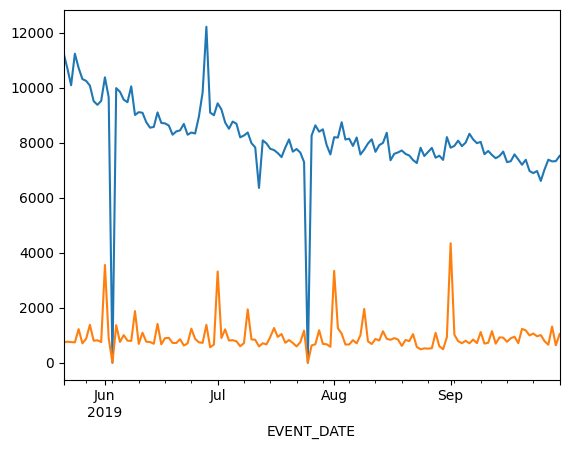

In [9]:
discontinued_products_df = purchase_product_df[purchase_product_df['PRODUCT_STATUS'] == 'Discontinue']
continued_products_df = purchase_product_df[purchase_product_df['PRODUCT_STATUS'] == 'Continue']
daily_hits_discontinued = discontinued_products_df.resample('D', on='EVENT_DATE')['HITS'].sum()
daily_hits_continued = continued_products_df.resample('D', on='EVENT_DATE')['HITS'].sum()
daily_hits_discontinued.plot()
daily_hits_continued.plot()
plt.show()

In [10]:
purchase_product_df_filtered = pd.merge(test_df, purchase_product_df, how='inner', on='PACK_ID')
purchase_product_df_filtered

,PACK_ID,EVENT_DATE,CUSTOMER_ID,HITS,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,TOTAL_DATA_VOL_GB


In [11]:
test_product_df = pd.merge(test_df, product_df, how='inner', on='PACK_ID')
test_product_df

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,352,Premium,Mobile Walet,396,7,52.0,New,7.615385
1,1735,Premium,Digital Wallets,396,7,72.0,New,5.500000
2,179,Premium,Mobile Walet,336,7,32.0,New,10.500000
3,1434,Premium,Mobile Walet,136,7,8.0,New,17.000000
4,426,Premium,Mobile Walet,296,7,20.0,New,14.800000
5,77,Premium,Mobile Walet,196,7,12.0,New,16.333333
6,1856,Premium,Mobile Walet,196,7,10.0,New,19.600000
7,150,Premium,Mobile Walet,1196,30,152.0,New,7.868421
8,1563,Premium,Mobile Walet,996,30,80.0,New,12.450000
9,801,Premium,Digital Wallets,1196,30,160.0,New,7.475000


In [12]:
latest_date_of_purchase = purchase_product_df.iloc[-1]['EVENT_DATE']
latest_date_of_purchase

Timestamp('2019-09-30 00:00:00')

In [13]:
purchase_product_df['CUSTOMER_ID'].nunique()

342635

In [14]:
purchase_product_df['SERVICE_TYPE'].value_counts()

SERVICE_TYPE
Premium     954953
Standard    253757
Name: count, dtype: int64

In [15]:
purchase_product_df_filtered = purchase_product_df[purchase_product_df['EVENT_DATE'] >= '2019-06-01']
purchase_product_df_filtered

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,TOTAL_DATA_VOL_GB
122168,2019-06-01,CD1F7EAD621D6C,1330,1,Standard,Digital Wallets,994,30,168.0,Discontinue,5.916667,168.0
122169,2019-06-01,CD20FB9FF49100,812,1,Premium,Cash,296,7,24.0,Discontinue,12.333333,24.0
122170,2019-06-01,CD214ADD83CFA9,622,1,Premium,Credit Card,110,30,4.0,Discontinue,27.500000,4.0
122171,2019-06-01,CD211EBE8FE0DD,1181,1,Premium,Cash,994,30,100.0,Discontinue,9.940000,100.0
122172,2019-06-01,CD20EE296E0002,2047,1,Premium,Cash,120,30,4.0,Continue,30.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1208705,2019-09-30,CD218220F4F1FA,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,6.800000,20.0
1208706,2019-09-30,CD216AE5C12541,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,6.800000,20.0
1208707,2019-09-30,CD212E0040B457,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,6.800000,20.0
1208708,2019-09-30,CD212FA9BD7AFA,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,6.800000,20.0


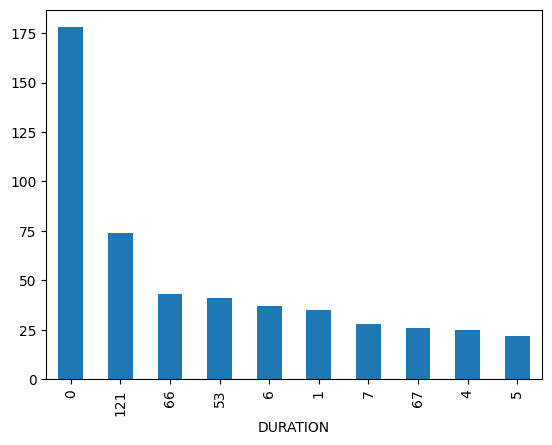

In [16]:
purchase_product_df_discontinued = purchase_product_df_filtered[purchase_product_df_filtered['PRODUCT_STATUS'] == 'Discontinue']
purchase_product_df_last_dates = purchase_product_df_discontinued.drop_duplicates(subset=['PACK_ID'], keep='last')
purchase_product_df_first_dates = purchase_product_df_discontinued.drop_duplicates(subset=['PACK_ID'], keep='first')
purchase_product_df_dates = pd.merge(purchase_product_df_first_dates, purchase_product_df_last_dates, on='PACK_ID', how='inner')
purchase_product_df_dates = purchase_product_df_dates[['PACK_ID', 'EVENT_DATE_x', 'EVENT_DATE_y']].rename(columns={'EVENT_DATE_x': 'START_DATE', 'EVENT_DATE_y': 'LAST_DATE'})
purchase_product_df_dates['DURATION'] = (purchase_product_df_dates['LAST_DATE'] - purchase_product_df_dates['START_DATE']).dt.days
purchase_product_df_dates['DURATION'].value_counts()[:10].plot(kind='bar')
plt.show()

In [17]:
purchase_product_df_offer = purchase_product_df[purchase_product_df['PACK_ID'].isin(purchase_product_df_dates[purchase_product_df_dates['DURATION'] == 0]['PACK_ID'])]
purchase_product_df_not_offer = purchase_product_df[~purchase_product_df['PACK_ID'].isin(purchase_product_df_dates[purchase_product_df_dates['DURATION'] == 0]['PACK_ID'])]
purchase_product_df_offer.describe().map(lambda x: f"{x:0.3f}")

,EVENT_DATE,PACK_ID,HITS,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE,TOTAL_DATA_VOL_GB
count,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000
mean,0.3f,1035.670,1.043,437.188,19.135,52.431,47.211,56.787
min,0.3f,15.000,1.000,110.000,3.000,0.200,2.281,0.200
25%,0.3f,492.000,1.000,200.000,7.000,12.000,4.938,12.000
50%,0.3f,1095.000,1.000,328.000,30.000,36.000,7.478,36.000
75%,0.3f,1497.000,1.000,672.000,30.000,64.000,22.000,64.000
max,0.3f,2059.000,2.000,3064.000,30.000,440.000,4970.000,880.000
std,nan,607.113,0.203,351.621,12.232,60.544,257.655,79.303


In [18]:
purchase_product_df_not_offer.describe().map(lambda x: f"{x:0.3f}")

,EVENT_DATE,PACK_ID,HITS,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE,TOTAL_DATA_VOL_GB
count,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000
mean,0.3f,1024.542,1.004,422.142,14.132,54.923,18.066,55.022
min,0.3f,1.000,1.000,100.000,3.000,0.200,0.500,0.200
25%,0.3f,425.000,1.000,178.000,3.000,16.000,6.000,16.000
50%,0.3f,923.000,1.000,296.000,7.000,32.000,8.708,32.000
75%,0.3f,1671.000,1.000,558.000,30.000,80.000,13.600,80.000
max,0.3f,2057.000,13.000,6926.000,30.000,400.000,4980.000,1440.000
std,nan,646.206,0.073,351.503,11.924,56.348,131.793,56.603


In [19]:
purchase_product_df['DATA_VOL_GB'].nunique()

142

In [20]:
monthly_hits = purchase_product_df.groupby(['PACK_ID', purchase_product_df['EVENT_DATE'].dt.to_period('M')])['HITS'].sum().reset_index()
monthly_hits

,PACK_ID,EVENT_DATE,HITS
0,1,2019-08,18
1,1,2019-09,8
2,2,2019-05,12
3,2,2019-06,22
4,2,2019-07,23
...,...,...,...
3788,2054,2019-08,2
3789,2055,2019-08,15
3790,2056,2019-09,11
3791,2057,2019-09,5


In [21]:
date_range = pd.period_range(start='2019-06', end='2019-09', freq='M')
all_combinations = pd.MultiIndex.from_product([product_df['PACK_ID'].unique(), date_range], names=['PACK_ID', 'EVENT_DATE'])
all_combinations

MultiIndex([(   1, '2019-06'),
            (   1, '2019-07'),
            (   1, '2019-08'),
            (   1, '2019-09'),
            (   2, '2019-06'),
            (   2, '2019-07'),
            (   2, '2019-08'),
            (   2, '2019-09'),
            (   3, '2019-06'),
            (   3, '2019-07'),
            ...
            (2057, '2019-08'),
            (2057, '2019-09'),
            (2058, '2019-06'),
            (2058, '2019-07'),
            (2058, '2019-08'),
            (2058, '2019-09'),
            (2059, '2019-06'),
            (2059, '2019-07'),
            (2059, '2019-08'),
            (2059, '2019-09')],
           names=['PACK_ID', 'EVENT_DATE'], length=8196)

In [22]:
monthly_hits = monthly_hits.set_index(['PACK_ID', 'EVENT_DATE']).reindex(all_combinations, fill_value=0).reset_index()
monthly_hits

,PACK_ID,EVENT_DATE,HITS
0,1,2019-06,0
1,1,2019-07,0
2,1,2019-08,18
3,1,2019-09,8
4,2,2019-06,22
...,...,...,...
8191,2058,2019-09,0
8192,2059,2019-06,0
8193,2059,2019-07,1
8194,2059,2019-08,0


In [23]:
test_product_df = pd.merge(test_df, product_df, on='PACK_ID', how='inner')
test_product_df

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,352,Premium,Mobile Walet,396,7,52.0,New,7.615385
1,1735,Premium,Digital Wallets,396,7,72.0,New,5.500000
2,179,Premium,Mobile Walet,336,7,32.0,New,10.500000
3,1434,Premium,Mobile Walet,136,7,8.0,New,17.000000
4,426,Premium,Mobile Walet,296,7,20.0,New,14.800000
5,77,Premium,Mobile Walet,196,7,12.0,New,16.333333
6,1856,Premium,Mobile Walet,196,7,10.0,New,19.600000
7,150,Premium,Mobile Walet,1196,30,152.0,New,7.868421
8,1563,Premium,Mobile Walet,996,30,80.0,New,12.450000
9,801,Premium,Digital Wallets,1196,30,160.0,New,7.475000


In [24]:
def mean_ignoring_initial_zeroes(data):
    # Convert data series to numpy array for easier manipulation
    values = data.to_numpy()
    # Find the first index where value is not zero using np.nonzero (returns a tuple hence [0][0])
    first_non_zero_index = np.nonzero(values)[0][0] if np.any(values != 0) else None
    # If there are non-zero values, calculate the mean from the first non-zero value onward
    if first_non_zero_index is not None:
        return values[first_non_zero_index:].mean()
    else:
        # Return NaN or 0 if all values are zero
        return 0


# HYPERPARAMETER BELOW

In [25]:
monthly_hits_discontinued = monthly_hits[monthly_hits['PACK_ID'].isin(product_df[product_df['PRODUCT_STATUS'] == 'Discontinue']['PACK_ID'])].reset_index(drop=True)
monthly_hits_discontinued = monthly_hits_discontinued[monthly_hits_discontinued['EVENT_DATE'].dt.month > 5]
monthly_hits_discontinued

,PACK_ID,EVENT_DATE,HITS
0,1,2019-06,0
1,1,2019-07,0
2,1,2019-08,18
3,1,2019-09,8
4,3,2019-06,429
...,...,...,...
5251,2057,2019-09,5
5252,2059,2019-06,0
5253,2059,2019-07,1
5254,2059,2019-08,0


In [26]:
product_means = monthly_hits_discontinued.groupby('PACK_ID')['HITS'].apply(mean_ignoring_initial_zeroes).reset_index(name='HITS_MEAN')
product_means

,PACK_ID,HITS_MEAN
0,1,13.000000
1,3,262.750000
2,4,1733.500000
3,6,810.000000
4,7,397.000000
...,...,...
1309,2054,2.000000
1310,2055,7.500000
1311,2056,11.000000
1312,2057,5.000000


In [27]:
product_df_aug = pd.merge(product_df, product_means, on='PACK_ID', how='inner')
product_df_aug

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,HITS_MEAN
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue,4.056250,13.000000
1,3,Premium,Mobile Walet,176,3,24.0,Discontinue,7.333333,262.750000
2,4,Premium,Cash,558,15,64.0,Discontinue,8.718750,1733.500000
3,6,Premium,Mobile Walet,196,3,28.0,Discontinue,7.000000,810.000000
4,7,Premium,Mobile Walet,898,30,44.0,Discontinue,20.409091,397.000000
...,...,...,...,...,...,...,...,...,...
1309,2054,Premium,Digital Wallets,258,7,40.0,Discontinue,6.450000,2.000000
1310,2055,Premium,Digital Wallets,180,7,68.0,Discontinue,2.647059,7.500000
1311,2056,Standard,Digital Wallets,178,3,52.0,Discontinue,3.423077,11.000000
1312,2057,Premium,Mobile Walet,996,30,176.0,Discontinue,5.659091,5.000000


In [28]:
product_df_aug['UNIT_PRICE'].value_counts()

UNIT_PRICE
5.000000     21
6.000000     15
4.500000     10
6.980000      9
4.000000      9
             ..
4.880000      1
35.000000     1
48.292683     1
8.900000      1
4.118750      1
Name: count, Length: 672, dtype: int64

In [29]:
product_df_aug

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,HITS_MEAN
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue,4.056250,13.000000
1,3,Premium,Mobile Walet,176,3,24.0,Discontinue,7.333333,262.750000
2,4,Premium,Cash,558,15,64.0,Discontinue,8.718750,1733.500000
3,6,Premium,Mobile Walet,196,3,28.0,Discontinue,7.000000,810.000000
4,7,Premium,Mobile Walet,898,30,44.0,Discontinue,20.409091,397.000000
...,...,...,...,...,...,...,...,...,...
1309,2054,Premium,Digital Wallets,258,7,40.0,Discontinue,6.450000,2.000000
1310,2055,Premium,Digital Wallets,180,7,68.0,Discontinue,2.647059,7.500000
1311,2056,Standard,Digital Wallets,178,3,52.0,Discontinue,3.423077,11.000000
1312,2057,Premium,Mobile Walet,996,30,176.0,Discontinue,5.659091,5.000000


In [30]:
test_product_df[~test_product_df['UNIT_PRICE'].isin(product_df_aug['UNIT_PRICE'])]

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,352,Premium,Mobile Walet,396,7,52.0,New,7.615385
4,426,Premium,Mobile Walet,296,7,20.0,New,14.800000
5,77,Premium,Mobile Walet,196,7,12.0,New,16.333333
6,1856,Premium,Mobile Walet,196,7,10.0,New,19.600000
7,150,Premium,Mobile Walet,1196,30,152.0,New,7.868421
8,1563,Premium,Mobile Walet,996,30,80.0,New,12.450000
10,1424,Standard,Credit Card,394,30,60.0,New,6.566667
11,1587,Premium,Digital Wallets,996,30,88.0,New,11.318182
12,1576,Standard,Mobile Walet,178,7,14.0,New,12.714286
13,90,Standard,Mobile Walet,356,7,44.0,New,8.090909


In [31]:
comparison = pd.merge(product_df_aug, test_product_df, on='PACK_PRICE', how='inner')[['PACK_PRICE', 'VALIDITY_x', 'DATA_VOL_GB_x', 'UNIT_PRICE_x', 'VALIDITY_y', 'DATA_VOL_GB_y', 'UNIT_PRICE_y']]
comparison.head(20)

,PACK_PRICE,VALIDITY_x,DATA_VOL_GB_x,UNIT_PRICE_x,VALIDITY_y,DATA_VOL_GB_y,UNIT_PRICE_y
0,196,3,28.0,7.000000,7,12.0,16.333333
1,196,3,28.0,7.000000,7,10.0,19.600000
2,136,3,16.0,8.500000,7,8.0,17.000000
3,136,3,16.0,8.500000,7,8.0,17.000000
4,136,3,14.0,9.714286,7,8.0,17.000000
5,136,3,14.0,9.714286,7,8.0,17.000000
6,196,3,44.0,4.454545,7,12.0,16.333333
7,196,3,44.0,4.454545,7,10.0,19.600000
8,136,3,12.0,11.333333,7,8.0,17.000000
9,136,3,12.0,11.333333,7,8.0,17.000000


In [32]:
product_df_aug.describe()

,PACK_ID,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE,HITS_MEAN
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,1038.614916,498.922374,18.720700,67.810594,29.206608,239.651256
std,590.781090,432.004571,11.770091,70.649980,207.533989,943.088551
min,1.000000,100.000000,3.000000,0.200000,2.281250,0.000000
25%,531.500000,200.000000,7.000000,20.000000,5.273352,2.500000
50%,1053.000000,356.000000,30.000000,40.000000,7.333333,22.125000
75%,1548.750000,698.000000,30.000000,92.000000,12.900000,136.750000
max,2059.000000,6926.000000,30.000000,440.000000,4980.000000,13760.000000


In [33]:
test_product_df.describe()

,PACK_ID,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE
count,20.00000,20.000000,20.000000,20.00000,20.000000
mean,888.70000,535.100000,15.050000,66.20000,10.587632
std,714.60413,416.885432,11.255291,61.74617,4.404658
min,29.00000,136.000000,7.000000,8.00000,4.950000
25%,171.75000,196.000000,7.000000,18.50000,7.247917
50%,672.50000,375.000000,7.000000,48.00000,9.700000
75%,1578.75000,996.000000,30.000000,82.00000,13.235714
max,1856.00000,1396.000000,30.000000,220.00000,19.600000


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [35]:
# Initialize label encoders
label_encoders = {}
categorical_columns = ['SERVICE_TYPE', 'PAYMENT_METHOD', 'VALIDITY']

# Encode only categorical variables
for column in categorical_columns:
    le = LabelEncoder()
    product_df_aug[column] = le.fit_transform(product_df_aug[column])
    label_encoders[column] = le

# Continuous variables to scale
continuous_features = ['UNIT_PRICE', 'PACK_PRICE', 'DATA_VOL_GB']
scaler = StandardScaler()
product_df_aug[continuous_features] = scaler.fit_transform(product_df_aug[continuous_features])

# Features and Target
X = product_df_aug.drop(['HITS_MEAN', 'PACK_ID', 'PRODUCT_STATUS'], axis=1)
y = product_df_aug['HITS_MEAN']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [39]:
# Configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, seed=42)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Evaluate the model using RMSE
y_pred = xgb_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on test data: {rmse}")


RMSE on test data: 1015.0838461108377


In [40]:
# Prepare test_product_df similarly
test_product_df[categorical_columns] = test_product_df[categorical_columns].apply(lambda col: label_encoders[col.name].transform(col))
test_product_df[continuous_features] = scaler.transform(test_product_df[continuous_features])

X_new_test = test_product_df.drop(['PACK_ID', 'PRODUCT_STATUS'], axis=1)

# Predict HITS_MEAN using the trained XGBoost regressor
test_product_df['Predicted_HITS_MEAN_XGB'] = xgb_regressor.predict(X_new_test)
test_product_df['HITS_XGB'] = test_product_df['Predicted_HITS_MEAN_XGB'].round().astype(int)

# Prepare final DataFrame
final_xgb_df = test_product_df[['PACK_ID', 'HITS_XGB']]
final_xgb_df.rename(columns={'HITS_XGB': 'HITS'}, inplace=True)

ValueError: y contains previously unseen labels: 0

In [38]:
final_xgb_df.to_csv('predicted_hits_xgb.csv', index=False)
final_xgb_df.head()

,PACK_ID,HITS
0,352,989
1,1735,748
2,179,297
3,1434,2338
4,426,937


In [98]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# Ridge Regression
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

Ridge()

In [99]:
# XGBoost evaluation
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_regressor.predict(X_test)))

# Random Forest evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_regressor.predict(X_test)))

# Gradient Boosting evaluation
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_regressor.predict(X_test)))

# Ridge Regression evaluation
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_regressor.predict(X_test)))

print(f"XGBoost RMSE: {xgb_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Gradient Boosting RMSE: {gb_rmse}")
print(f"Ridge Regression RMSE: {ridge_rmse}")

XGBoost RMSE: 1015.0838461108377
Random Forest RMSE: 1065.1186909928317
Gradient Boosting RMSE: 1055.9158520013177
Ridge Regression RMSE: 1112.0900228114247


In [100]:
# Averaging predictions
predictions_xgb = xgb_regressor.predict(X_test)
predictions_rf = rf_regressor.predict(X_test)
predictions_gb = gb_regressor.predict(X_test)
predictions_ridge = ridge_regressor.predict(X_test)

# Average predictions
average_predictions = (predictions_xgb + predictions_rf + predictions_gb + predictions_ridge) / 4

# Evaluate ensemble
ensemble_rmse = np.sqrt(mean_squared_error(y_test, average_predictions))
print(f"Ensemble RMSE: {ensemble_rmse}")

Ensemble RMSE: 1043.5296385910808


In [101]:
# Predict on new test data
test_predictions_xgb = xgb_regressor.predict(X_new_test)
test_predictions_rf = rf_regressor.predict(X_new_test)
test_predictions_gb = gb_regressor.predict(X_new_test)
test_predictions_ridge = ridge_regressor.predict(X_new_test)

# Average the predictions
test_product_df['Predicted_HITS_MEAN_Ensemble'] = (test_predictions_xgb + test_predictions_rf + test_predictions_gb + test_predictions_ridge) / 4
test_product_df['HITS_Ensemble'] = test_product_df['Predicted_HITS_MEAN_Ensemble'].round().astype(int)

# Prepare final DataFrame with ensemble results
final_ensemble_df = test_product_df[['PACK_ID', 'HITS_Ensemble']]
final_ensemble_df.rename(columns={'HITS_Ensemble': 'HITS'}, inplace=True)

final_ensemble_df.to_csv('predicted_hits_ensemble.csv', index=False)
print(final_ensemble_df.head())

   PACK_ID  HITS
0      352   641
1     1735   458
2      179   398
3     1434  1550
4      426   758


/tmp/ipykernel_41571/1575896137.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_ensemble_df.rename(columns={'HITS_Ensemble': 'HITS'}, inplace=True)


In [104]:
from sklearn.model_selection import cross_val_score

# Validation using cross-validation for each model
scores_xgb = cross_val_score(xgb_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores_rf = cross_val_score(rf_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores_gb = cross_val_score(gb_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores_ridge = cross_val_score(ridge_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Calculate mean RMSE for each model
mean_rmse_xgb = np.sqrt(-scores_xgb.mean())
mean_rmse_rf = np.sqrt(-scores_rf.mean())
mean_rmse_gb = np.sqrt(-scores_gb.mean())
mean_rmse_ridge = np.sqrt(-scores_ridge.mean())

In [105]:
# Calculate weights (inverse of RMSE)
weight_xgb = 1 / mean_rmse_xgb
weight_rf = 1 / mean_rmse_rf
weight_gb = 1 / mean_rmse_gb
weight_ridge = 1 / mean_rmse_ridge

# Normalize weights so they sum to 1
total_weight = weight_xgb + weight_rf + weight_gb + weight_ridge
weight_xgb /= total_weight
weight_rf /= total_weight
weight_gb /= total_weight
weight_ridge /= total_weight

In [106]:
# Predict on test set
test_predictions_xgb = xgb_regressor.predict(X_test)
test_predictions_rf = rf_regressor.predict(X_test)
test_predictions_gb = gb_regressor.predict(X_test)
test_predictions_ridge = ridge_regressor.predict(X_test)

# Compute weighted average
weighted_predictions = (test_predictions_xgb * weight_xgb +
                        test_predictions_rf * weight_rf +
                        test_predictions_gb * weight_gb +
                        test_predictions_ridge * weight_ridge)

# Evaluate ensemble
ensemble_rmse = np.sqrt(mean_squared_error(y_test, weighted_predictions))
print(f"Weighted Ensemble RMSE: {ensemble_rmse}")

Weighted Ensemble RMSE: 1043.9217643131472


In [107]:
# Predict on new test data
test_predictions_xgb = xgb_regressor.predict(X_new_test)
test_predictions_rf = rf_regressor.predict(X_new_test)
test_predictions_gb = gb_regressor.predict(X_new_test)
test_predictions_ridge = ridge_regressor.predict(X_new_test)

# Compute weighted average for new test data
test_product_df['Predicted_HITS_MEAN_Ensemble'] = (test_predictions_xgb * weight_xgb +
                                                   test_predictions_rf * weight_rf +
                                                   test_predictions_gb * weight_gb +
                                                   test_predictions_ridge * weight_ridge)
test_product_df['HITS_Ensemble'] = test_product_df['Predicted_HITS_MEAN_Ensemble'].round().astype(int)

# Prepare final DataFrame with ensemble results
final_ensemble_df = test_product_df[['PACK_ID', 'HITS_Ensemble']]
final_ensemble_df.rename(columns={'HITS_Ensemble': 'HITS'}, inplace=True)
final_ensemble_df.to_csv('predicted_hits_weighted_ensemble.csv', index=False)
print(final_ensemble_df.head())

   PACK_ID  HITS
0      352   644
1     1735   457
2      179   403
3     1434  1559
4      426   769


/tmp/ipykernel_41571/2441181583.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_ensemble_df.rename(columns={'HITS_Ensemble': 'HITS'}, inplace=True)


In [102]:
test_predictions_xgb

array([1016.1483 ,  765.50336,  312.2428 , 2356.0552 ,  935.8341 ,
        996.8168 ,  906.5372 , 1470.872  , 1345.9932 , 1047.8401 ,
        274.8301 ,  387.079  ,  155.44594,  998.3987 ,  136.56834,
        280.78793,  279.5433 ,   82.4584 , 1469.4055 ,  308.29248],
      dtype=float32)

In [41]:
correlation_matrix = product_df_aug.drop(['HITS_MEAN', 'PACK_ID', 'PRODUCT_STATUS'], axis=1).corr()

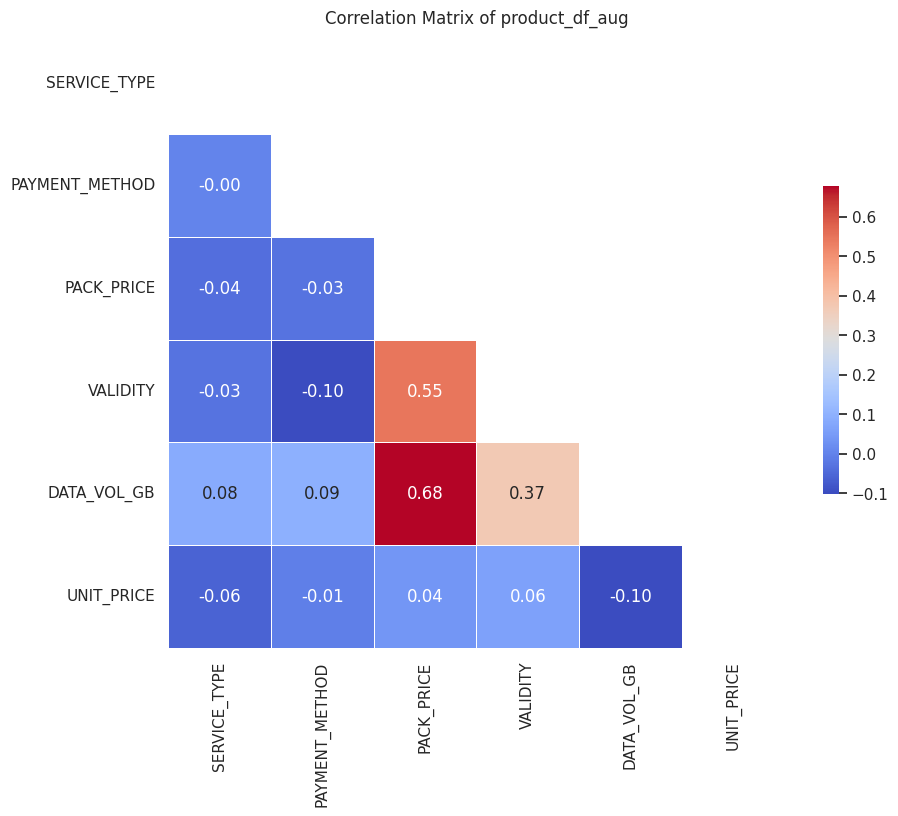

In [42]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of product_df_aug')
plt.show()

In [59]:
product_df_continued = product_df[product_df['PRODUCT_STATUS'] == 'Continue']
product_df_continued

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
1,2,Standard,Cash,328,30,24.0,Continue,13.666667
25,27,Premium,Cash,320,30,12.0,Continue,26.666667
32,34,Premium,Cash,596,30,28.0,Continue,21.285714
44,46,Standard,Cash,1396,30,260.0,Continue,5.369231
52,54,Premium,Cash,110,30,4.0,Continue,27.500000
...,...,...,...,...,...,...,...,...
2013,2024,Premium,Cash,532,30,20.0,Continue,26.600000
2029,2040,Premium,Cash,1598,30,48.0,Continue,33.291667
2030,2041,Premium,Cash,300,30,40.0,Continue,7.500000
2033,2044,Premium,Cash,416,30,8.0,Continue,52.000000


In [61]:
test_product_df = pd.merge(test_df, product_df, how='inner', on='PACK_ID')
test_product_df

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,352,Premium,Mobile Walet,396,7,52.0,New,7.615385
1,1735,Premium,Digital Wallets,396,7,72.0,New,5.500000
2,179,Premium,Mobile Walet,336,7,32.0,New,10.500000
3,1434,Premium,Mobile Walet,136,7,8.0,New,17.000000
4,426,Premium,Mobile Walet,296,7,20.0,New,14.800000
5,77,Premium,Mobile Walet,196,7,12.0,New,16.333333
6,1856,Premium,Mobile Walet,196,7,10.0,New,19.600000
7,150,Premium,Mobile Walet,1196,30,152.0,New,7.868421
8,1563,Premium,Mobile Walet,996,30,80.0,New,12.450000
9,801,Premium,Digital Wallets,1196,30,160.0,New,7.475000


In [67]:
# Remove unnecessary columns
test_product_df_filtered = test_product_df.drop(['PRODUCT_STATUS', 'UNIT_PRICE'], axis=1)
product_df_continued_filtered = product_df_continued.drop(['PRODUCT_STATUS', 'UNIT_PRICE'], axis=1)

In [90]:
from sklearn.preprocessing import MinMaxScaler

def find_most_similar(test_row, df_continued):
    # Filter for exact matches on categorical attributes
    mask = (df_continued['SERVICE_TYPE'] == test_row['SERVICE_TYPE']) & \
           (df_continued['PAYMENT_METHOD'] == test_row['PAYMENT_METHOD']) & \
           (df_continued['VALIDITY'] == test_row['VALIDITY'])
    matching_df = df_continued[mask]

    # If no exact matches, return None (or an empty series)
    if matching_df.empty:
        return pd.Series()

    # Selecting continuous variables
    continuous_vars = ['PACK_PRICE', 'DATA_VOL_GB']

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Combine and scale
    combined_data = pd.concat([matching_df[continuous_vars], pd.DataFrame([test_row[continuous_vars]], columns=continuous_vars)])
    scaled_data = scaler.fit_transform(combined_data)
    
    # Separate the test row and the matching dataframe scaled data
    scaled_test_row = scaled_data[-1]
    scaled_df_values = scaled_data[:-1]

    # Calculate Euclidean distances using normalized data
    distances = np.linalg.norm(scaled_df_values - scaled_test_row, axis=1)
    # print(distances)

    # Identify the index of the closest match
    closest_idx = distances.argmin()
    smallest_distance = distances.min()

    if smallest_distance > 0.3:
        return pd.Series()
    
    return matching_df.iloc[closest_idx]

In [91]:
# Assuming test_product_df_filtered and product_df_continued_filtered are already defined
closest_matches = test_product_df_filtered.apply(lambda row: find_most_similar(row, product_df_continued_filtered), axis=1)

# Combine and prepare for display
result_df = test_product_df_filtered.join(closest_matches, rsuffix='_closest')
final_results = result_df[['PACK_ID', 'SERVICE_TYPE', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB', 
                           'PACK_ID_closest', 'SERVICE_TYPE_closest', 'PAYMENT_METHOD_closest', 'PACK_PRICE_closest', 'VALIDITY_closest', 'DATA_VOL_GB_closest']]
final_results.dropna(inplace=True)
final_results

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PACK_ID_closest,SERVICE_TYPE_closest,PAYMENT_METHOD_closest,PACK_PRICE_closest,VALIDITY_closest,DATA_VOL_GB_closest
9,801,Premium,Digital Wallets,1196,30,160.0,890.0,Premium,Digital Wallets,1196.0,30.0,180.0
10,1424,Standard,Credit Card,394,30,60.0,1892.0,Standard,Credit Card,598.0,30.0,80.0
11,1587,Premium,Digital Wallets,996,30,88.0,890.0,Premium,Digital Wallets,1196.0,30.0,180.0
14,404,Premium,Digital Wallets,996,30,160.0,890.0,Premium,Digital Wallets,1196.0,30.0,180.0
15,29,Premium,Mobile Walet,1396,30,220.0,845.0,Premium,Mobile Walet,1196.0,30.0,240.0


In [92]:
final_results['UNIT_PRICE'] = final_results['DATA_VOL_GB'] / final_results['PACK_PRICE']
final_results['UNIT_PRICE_closest'] = final_results['DATA_VOL_GB_closest'] / final_results['PACK_PRICE_closest']
final_results

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PACK_ID_closest,SERVICE_TYPE_closest,PAYMENT_METHOD_closest,PACK_PRICE_closest,VALIDITY_closest,DATA_VOL_GB_closest,UNIT_PRICE,UNIT_PRICE_closest
9,801,Premium,Digital Wallets,1196,30,160.0,890.0,Premium,Digital Wallets,1196.0,30.0,180.0,0.133779,0.150502
10,1424,Standard,Credit Card,394,30,60.0,1892.0,Standard,Credit Card,598.0,30.0,80.0,0.152284,0.133779
11,1587,Premium,Digital Wallets,996,30,88.0,890.0,Premium,Digital Wallets,1196.0,30.0,180.0,0.088353,0.150502
14,404,Premium,Digital Wallets,996,30,160.0,890.0,Premium,Digital Wallets,1196.0,30.0,180.0,0.160643,0.150502
15,29,Premium,Mobile Walet,1396,30,220.0,845.0,Premium,Mobile Walet,1196.0,30.0,240.0,0.157593,0.200669


In [94]:
monthly_hits_continued = monthly_hits[monthly_hits['PACK_ID'].isin(final_results['PACK_ID_closest'].astype(int))].reset_index(drop=True)
monthly_hits_continued = monthly_hits_continued[monthly_hits_continued['EVENT_DATE'].dt.month > 5]
monthly_hits_continued

,PACK_ID,EVENT_DATE,HITS
0,845,2019-06,0
1,845,2019-07,0
2,845,2019-08,20
3,845,2019-09,0
4,890,2019-06,1445
5,890,2019-07,840
6,890,2019-08,0
7,890,2019-09,0
8,1892,2019-06,53
9,1892,2019-07,66


In [96]:
product_means_continued = monthly_hits_continued.groupby('PACK_ID')['HITS'].apply(mean_ignoring_initial_zeroes).reset_index(name='HITS_MEAN')
product_means_continued

,PACK_ID,HITS_MEAN
0,845,10.00
1,890,571.25
2,1892,89.75


In [97]:
final_xgb_df

,PACK_ID,HITS
0,352,989
1,1735,748
2,179,297
3,1434,2338
4,426,937
5,77,992
6,1856,895
7,150,1460
8,1563,1324
9,801,1042
